In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sbi.inference.abc.smcabc import SMCABC as abc
from sbi import utils as utils_sbi
import sys
import os

module_path = os.path.abspath(os.path.join('..', 'ABC'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ABC import *

import seaborn as sns
import styling_funcs as style
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import global_vars as gvars
import numpy as np

In [11]:
ps = [0.1,0.25,0.5,0.75,0.95]
posteriors =[np.load('results/ABC_p=%s_v1_4par.npy'%p,allow_pickle=1) for p in ps]

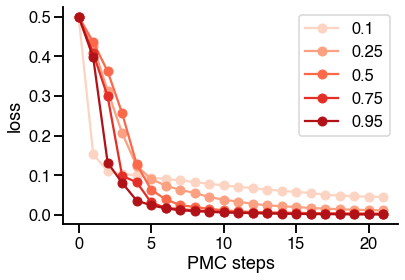

In [12]:
sns.set_context('talk')
colors = sns.color_palette('Reds',n_colors = len(ps))
for i,posterior in enumerate(posteriors):
    # posterior = posteriors[1]
    eps = [e['epsilon'] for e in posterior]
    # last_valid_ind = 
    plt.plot(eps,'-o',label=ps[i],color=colors[i])
    # plt.yscale('log')
plt.ylabel('loss')
# plt.axhline(5.2451693006271e-06
# )
# plt.axhline(0.008601205072314138)
plt.xlabel('PMC steps')
plt.legend()
    
sns.despine()

<Figure size 432x288 with 0 Axes>

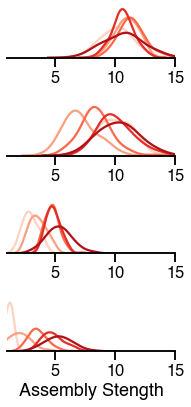

In [13]:
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors]
# plt.yabel()
plt.figure()
colors = sns.color_palette('Reds',n_colors = len(ps))
plt.figure(figsize=(3,6))
for i in range(4):
    plt.subplot(4,1,i+1)
    for p_i,p in enumerate(ps):
        sns.kdeplot(samples[p_i][:,i],color=colors[p_i],bw_method=0.5)
        plt.xlim(1,15)
        # plt.ylim(0,0.3)
        if p_i<len(ps):
            sns.despine(left=1)
            plt.yticks([])
            # plt.xticks([])
            plt.ylabel('')
            # plt.axis('off')
        # else:
            # sns.despine(left=1)

plt.xlabel('Assembly Stength')
#legend

# plt.xticks(np.arange(20))
plt.tight_layout()

In [14]:
#Get Maximum Aposteriori
MAPs = [getMAP(posterior[-1]['theta accepted'],[5.,5.,5.,5]) for posterior in posteriors]

In [15]:
MAPs

[array([9.62421259, 9.03348216, 2.79774582, 0.97764645]),
 array([10.84986061,  6.82526562,  3.7913622 ,  2.20276989]),
 array([11.24195986,  8.39949747,  4.60174707,  3.49451743]),
 array([10.42163801,  9.92709262,  4.82734969,  4.75511737]),
 array([10.94368976, 10.38547907,  5.84188585,  5.64139524])]

In [16]:
def reshape_arrays(db_collected,db_null_collected,db_full_collected):
    db_collected=db_collected[0].numpy()
    db_collected= db_collected.reshape((5,20,7))
    db_null_collected=db_null_collected[0].numpy()
    db_null_collected= db_null_collected.reshape((5,20,7))
    db_full_collected=db_full_collected[0].numpy()
    db_full_collected= db_full_collected.reshape((5,20,7))
    return db_collected,db_null_collected,db_full_collected

db_collected,db_null_collected,db_full_collected = np.load('results/DB_ps_full_v4_s2n=0.2_woverp.npy',allow_pickle=True) #
db_collected,db_null_collected,db_full_collected = reshape_arrays(db_collected,db_null_collected,db_full_collected)
import seaborn as sns
import global_vars as gvars
na = np.array

WARNING    <ipython-input-17-95ac63d1a01b>:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
 [py.warnings]


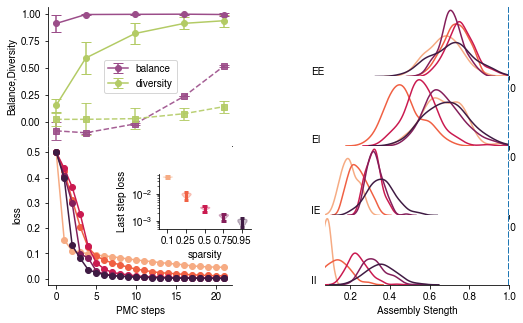

In [17]:
import seaborn as sns
import global_vars as gvars
sns.reset_orig()
# set the grid
fig, axs = plt.subplot_mosaic([['B','C1'],
                              ['B','C2'],
                              ['A','C3'],
                               ['A','C4'],
                              ],
                              constrained_layout=True, figsize = style.two_col_size(),
                                 gridspec_kw={
        "hspace": 0.,
        "wspace": .5
    },)


ps = [0.1,0.25,0.5,0.75,0.95]


# Colors for different sparsities
colors = sns.color_palette('rocket_r',n_colors = len(ps))

############################################# PANEL A#############################################
for i,posterior in enumerate(posteriors):
    # posterior = posteriors[1]
    eps = [e['epsilon'] for e in posterior]
    # last_valid_ind = 
    axs['A'].plot(eps,'-o',label=ps[i],color=colors[i])
    # axs['A'].set_yscale('log')
axs['A'].set_ylabel('loss')
# plt.axhline(5.2451693006271e-06
# )
# plt.axhline(0.008601205072314138)
axs['A'].set_xlabel('PMC steps')
# axs['A'].legend()
sns.despine(ax=axs['A'])

axin1 = axs['A'].inset_axes([0.6, 0.4, 0.5, 0.4])
for i,posterior in enumerate(posteriors):
    violin_parts = axin1.violinplot(posterior[-1]['D accepted'],positions=[i,])    
    axin1.set_yscale('log')
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin_parts[partname]
        vp.set_edgecolor(colors[i])
        vp.set_linewidth(3)
    
    for pc in violin_parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor(colors[i])
axin1.set_xticks(range(5),ps)
axin1.set_xlabel('sparsity')
axin1.set_ylabel('Last step loss')
sns.despine(ax = axin1)




############################################# PANEL B#############################################

ps = [0.1,0.25,0.5,0.75,0.95]

axs['B'].errorbar(ps,np.mean(db_collected[:,:,5],1),np.std(db_collected[:,:,5],1),
                  fmt='-o',capsize=5,color=gvars.colors["tuning"],label='balance')
axs['B'].errorbar(na(ps),np.mean(db_null_collected[:,:,5],1),np.std(db_collected[:,:,5],1),
                  fmt='--s',color=gvars.colors["tuning"],alpha=0.9,capsize=5)


# axs['B'].errorbar(na(ps),np.mean(db_full_collected[1:,:,5],1),np.std(db_collected[1:,:,5],1),
                  # fmt='--^',color=gvars.colors["tuning"],capsize=5)
# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
axs['B'].set_ylabel('Balance,Diversity')
axs['B'].set_xlabel('p')
axs['B'].errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
                  fmt='-o',capsize=5,color=gvars.colors["diversity"],label='diversity')
axs['B'].errorbar(ps,np.mean(db_null_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
                  fmt='--s',color=gvars.colors["diversity"],alpha=0.9,capsize=5)

# axs['B'].errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
                  # fmt='-o',capsize=5,color=gvars.colors["diversity"],label='diversity')
# axs['B'].errorbar(ps,np.mean(db_full_collected[:,:,5],1),np.std(db_collected[:,:,6],1),
#                   fmt=':^',color=gvars.colors["tuning"],alpha=0.9,capsize=5)
# axs['B'].errorbar(ps,np.mean(db_full_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
#                   fmt=':^',color=gvars.colors["diversity"],alpha=0.9,capsize=5)
# axs['B'].errorbar(na(ps),np.mean(db_full_collected[1:,:,6],1),np.std(db_collected[1:,:,5],1),
                  # fmt='--^',color=gvars.colors["diversity"],capsize=5)
axs['B'].legend()
sns.despine(ax=axs['B'])
############################################# PANEL C#############################################
map_95 = MAPs[-1]
assmeblies = ['EE','EI','IE','II']
# ps = [0.1,0.25,0.5,0.75,0.95]
for i in range(4):
    axs['C%s'%str(i+1)].text(0,0.2,s=assmeblies[i])
    for p_i,p in enumerate(ps):
        sns.kdeplot(na(samples[p_i][:,i])/15,color=colors[p_i],bw_method=.4,ax=axs['C%s'%str(i+1)])
        axs['C%s'%str(i+1)].axvline(1,linestyle='--')
        # axs['C%s'%str(i+1)].axvline(map_95[i],linestyle=':')
        # axs['C%s'%str(i+1)].set_xlim(1.,15)
        axs['C%s'%str(i+1)].set_xlim(0.07,1)
        # plt.ylim(0,0.3)
        if p_i<len(ps):
            sns.despine(left=1,ax=axs['C%s'%str(i+1)])
            axs['C%s'%str(i+1)].set_yticks([])
            # plt.xticks([])
            axs['C%s'%str(i+1)].set_ylabel('')
            # plt.axis('off')
        # else:
            # sns.despine(left=1)

axs['C4'].set_xlabel('Assembly Stength')



plt.tight_layout()
# plt.savefig('results/figs/sparsity_figure.pdf')
